In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings("ignore")

### Preparing the Dataset

In [2]:
df = pd.read_csv("restaurant_data.csv")
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [3]:
df.shape

(8368, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

### summarizing the stats of the data

In [5]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


### Check the missing values

In [6]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

### Exploratory Data Analysis

<Axes: >

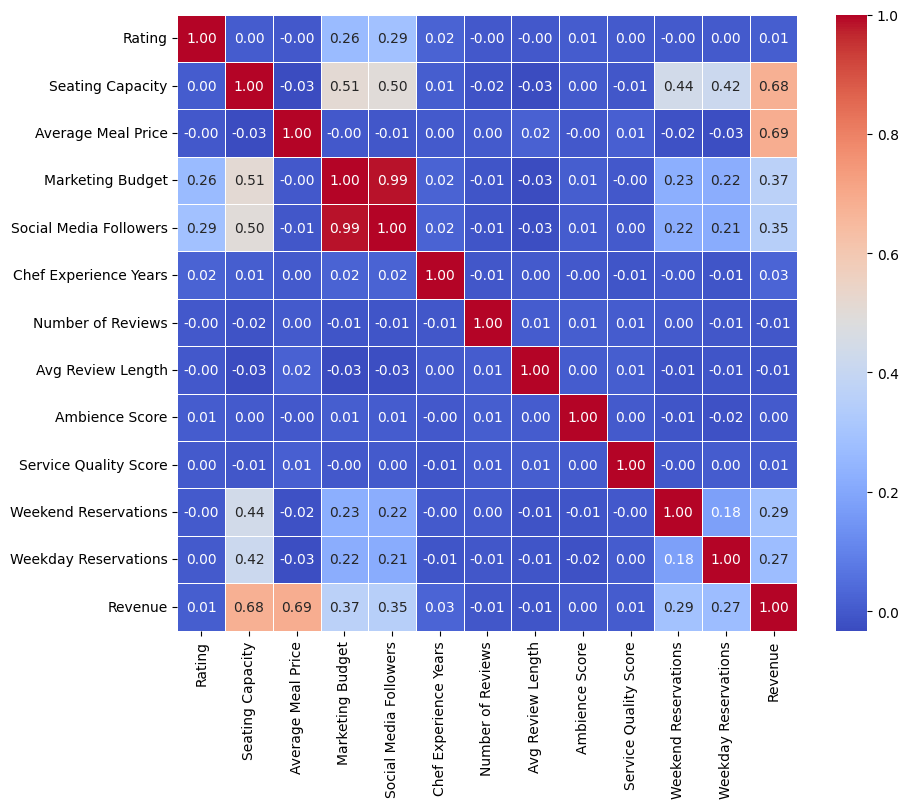

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

<Figure size 300x300 with 0 Axes>

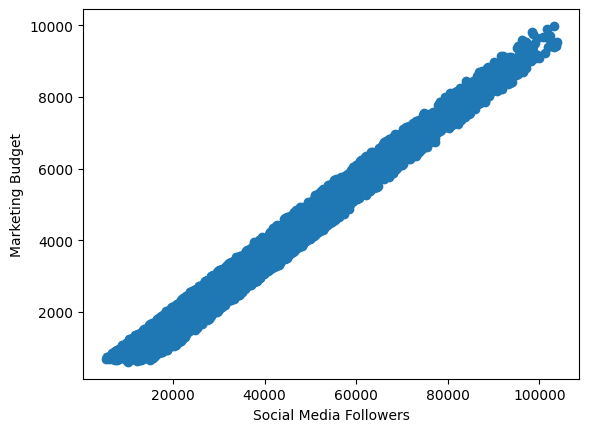

<Figure size 300x300 with 0 Axes>

In [8]:
plt.scatter(df['Social Media Followers'],df['Marketing Budget'])
plt.xlabel("Social Media Followers")
plt.ylabel("Marketing Budget")
plt.figure(figsize=(3, 3)) 

<Figure size 300x300 with 0 Axes>

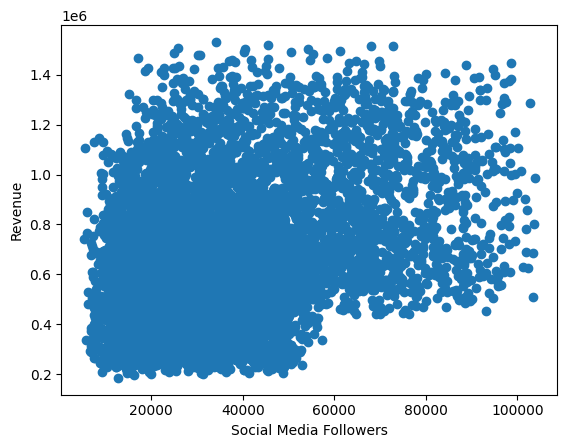

<Figure size 300x300 with 0 Axes>

In [9]:
plt.scatter(df['Social Media Followers'],df['Revenue'])
plt.xlabel("Social Media Followers")
plt.ylabel("Revenue")
plt.figure(figsize=(3, 3)) 

- We can drop Social Media Followers, as it is highly correlated with Marketing Budget

### Distribution of categorical features

In [10]:
def pieplot(data, column):
    val = df[column].value_counts().values
    ind = df[column].value_counts().index
    colors = sns.color_palette(palette='Set2')[0:len(ind)]
    plt.figure(figsize=(3, 3))
    plt.pie(val, labels=ind, colors=colors, autopct='%.0f%%', textprops={'fontsize': 8})
    plt.title(f'Distribution {column}', fontsize=16)
    plt.show()

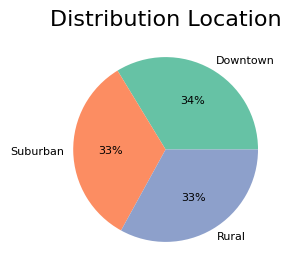

In [11]:
pieplot(df, 'Location')

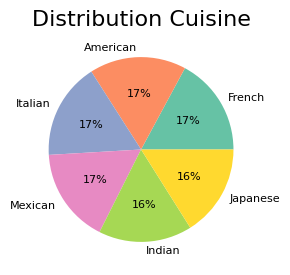

In [12]:
pieplot(df, 'Cuisine')

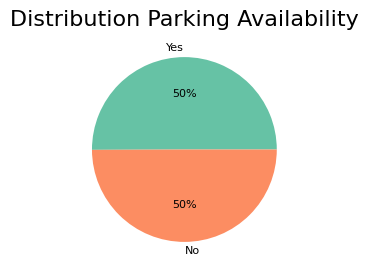

In [13]:
pieplot(df, 'Parking Availability')

### Final Data Frame

In [4]:
from sklearn.preprocessing import LabelEncoder

encoders = {
    'Location': LabelEncoder(),
    'Cuisine': LabelEncoder(),
    'Parking Availability': LabelEncoder()
}

for column, encoder in encoders.items():
    df[column] = encoder.fit_transform(df[column])

with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [5]:
df = df.drop(columns=['Name', 'Social Media Followers'])
X = df.drop('Revenue',axis=1)
y = df['Revenue']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [8]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate the performance metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    # Store the results
    model_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "adj_r2": adj_r2
    }

# Step 6: Find the best model based on R-squared (or any other metric)
best_model = max(model_results, key=lambda k: model_results[k]['R2'])

# Display the results
print(f"Best Model: {best_model}\n")
print("Performance Metrics:")
print(pd.DataFrame(model_results).T)

Best Model: Random Forest

Performance Metrics:
                                    MAE           MSE           RMSE  \
Linear Regression          41766.815458  3.042928e+09   55162.739288   
Ridge Regression           41762.748522  3.042781e+09   55161.405389   
Lasso Regression           41766.515502  3.042910e+09   55162.577314   
Decision Tree              12286.418204  2.501826e+08   15817.160977   
Random Forest               6199.181927  6.518159e+07    8073.511726   
Gradient Boosting           7798.219786  1.062519e+08   10307.856058   
Support Vector Regressor  211174.725980  7.356549e+10  271229.585003   
K-Nearest Neighbors        68442.913033  7.753129e+09   88051.856087   

                                R2    adj_r2  
Linear Regression         0.957265  0.957026  
Ridge Regression          0.957267  0.957028  
Lasso Regression          0.957266  0.957026  
Decision Tree             0.996486  0.996467  
Random Forest             0.999085  0.999079  
Gradient Boosting    

In [9]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
rand_pred=model.predict(X_test)

In [11]:
rand_pred

array([482345.3285, 292539.8815, 457050.5598, ..., 725976.9489,
       943111.4333, 995836.2901])

### Assumptions

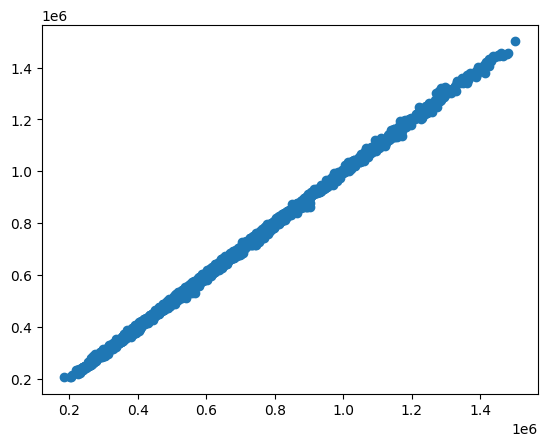

In [12]:
## plot a scatter plot for the prediction
plt.scatter(y_test, rand_pred)

In [13]:
residuals=y_test-rand_pred
residuals

2412    -6416.7285
6832     8116.1085
5154      374.7502
7081      459.0177
6601   -11592.1048
           ...    
5540     1511.6170
1789    -8046.3388
5629    -6652.3989
2059     1654.0767
4487    -2324.9901
Name: Revenue, Length: 2511, dtype: float64

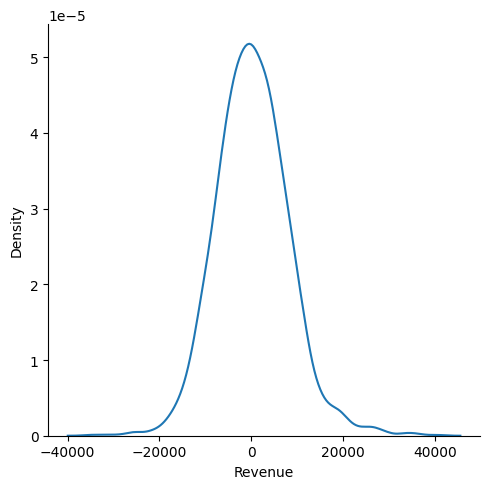

In [14]:
###ploting this residuals
sns.displot(residuals, kind="kde")

### New data prediction

In [16]:
model.predict(sc.transform(X.iloc[0].values.reshape(1, -1)))

array([645595.069])

### Pickling the model file for Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('randmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('randmodel.pkl','rb'))

In [ ]:
pickled_model.predict(sc.transform(X.iloc[0].values.reshape(1, -1)))